<div style="width:100%;height:100px;text-align:center;border: 4px solid black;background-color:#E6BF00;color:white">

<header style="width:100%;height:100px;">
  <h1><b> Session 003</b></h1>
    <h4> Basic Natural language processing </h4>
</header>

<div> 

<div style='border: 4px solid #E6BF00;padding:9px;'>

By: Farhad Shadmand 
    
https://github.com/farhadsh1992
    
</div>

<div style="border: 4px solid #3550B7;background-color:#BFE6FF;color:black;border-radius: 5px;padding:7px">
  <strong> Refrence: </strong><br>



http://nadbordrozd.github.io/blog/2016/05/20/text-classification-with-word2vec/
  
https://towardsdatascience.com/using-scikit-learn-to-find-bullies-c47a1045d92f
    
https://www.kaggle.com/eswarbabu88/toxic-comment-glove-logistic-regression
    
https://www.kaggle.com/stacykurnikova/using-glove-embedding
    
https://www.kaggle.com/ankitswarnkar/word-embedding-using-glove-vector
    
https://textminingonline.com/getting-started-with-word2vec-and-glove-in-python
    
https://markhneedham.com/blog/2018/05/19/interpreting-word2vec-glove-embeddings-sklearn-neo4j-graph-algorithms/
    
http://nadbordrozd.github.io/blog/2016/05/20/text-classification-with-word2vec/
    
https://radimrehurek.com/gensim/sklearn_api/w2vmodel.html
    
https://www.kaggle.com/reiinakano/basic-nlp-bag-of-words-tf-idf-word2vec-lstm
    
</div>

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1>  Result of ML <h1>
</div>

In [127]:
# For dimonation = 100
df_re = pd.DataFrame(result)
df_re.sort_values('cross_validation_train').head(len(df_re))

,title,cross_validation_train,accuracy_test
2,XGBRegressor,-0.032793,0.471631
4,GaussianNB,0.495984,0.492908
3,KNeighborsClassifier,0.503102,0.471631
0,LogisticRegression,0.509761,0.475177
6,LinearSVC,0.513314,0.478723
1,ExtraTreesClassifier,0.514203,0.475177
5,DecisionTreeClassifier,0.516409,0.498227


In [161]:
# For dimonation = 25 
df_re2 = pd.DataFrame(result)
df_re2.sort_values('cross_validation_train').head(len(df_re))

,title,cross_validation_train,accuracy_test
2,XGBRegressor,-0.033674,0.484043
3,KNeighborsClassifier,0.502654,0.484043
4,GaussianNB,0.503102,0.508865
0,LogisticRegression,0.503109,0.501773
6,LinearSVC,0.505328,0.491135
5,DecisionTreeClassifier,0.513318,0.500000
1,ExtraTreesClassifier,0.520854,0.500000


In [186]:
# For dimonation = 10
df_re3 = pd.DataFrame(result)
df_re3.sort_values('cross_validation_train').head(len(df_re))

,title,cross_validation_train,accuracy_test
2,XGBRegressor,-0.012372,0.498227
0,LogisticRegression,0.487987,0.519504
6,LinearSVC,0.490655,0.510638
4,GaussianNB,0.499987,0.508865
5,DecisionTreeClassifier,0.509322,0.492908
1,ExtraTreesClassifier,0.519085,0.484043
3,KNeighborsClassifier,0.535065,0.498227


In [210]:
# For dimonation = 5
df_re4 = pd.DataFrame(result)
df_re4.sort_values('cross_validation_train').head(len(df_re))

,title,cross_validation_train,accuracy_test
2,XGBRegressor,-0.025363,0.487589
4,GaussianNB,0.501322,0.507092
5,DecisionTreeClassifier,0.504437,0.521277
0,LogisticRegression,0.507525,0.510638
6,LinearSVC,0.510633,0.510638
1,ExtraTreesClassifier,0.518642,0.482270
3,KNeighborsClassifier,0.522646,0.487589


<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1>  Load data <h1>
</div>

In [1]:
import numpy as np
import pandas as pd
import re

In [78]:
#data_path = '/Users/apple/Documents/Programming/python/Project/data/Clean_tweets/2Tesla_label_from_2010-06-29_to_2019-02-26_2019227.csv'
data_path = '/Users/apple/Documents/Programming/python/Project/data/tweets/2Tesla_label_from_2010-06-29_to_2019-02-26_2019227.csv'
df_data = pd.read_csv(data_path)
#df_data = df_data.dropna().reset_index()
def xx(x):
    if x==-1:
        return 0
    else:
        return x
#df_data['Price_label(0,1)'] = df_data['Price_label(0,1)'].apply(xx)
#df_data['text'] = df_data['clean_text'].apply(lambda x: re.sub('-PRON- ','',x))
#df_data['text'] = df_data['clean_text'].apply(lambda x: re.sub('-PRON-','',x))
#df_data = df_data.reindex()
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2816 entries, 0 to 2815
Data columns (total 5 columns):
created_at          2816 non-null object
clean_text          2816 non-null object
Price_label(0,1)    2816 non-null int64
text                2816 non-null object
label               2816 non-null int64
dtypes: int64(2), object(3)
memory usage: 110.1+ KB


In [67]:
df_data['label'] = df_data['Price_label(0,1)']

In [68]:
""" 
number = []
for num,text in enumerate(df_data.text):
    words = text.split(' ')
    if len(words)<=1:
        df_data.drop([num],axis=0)
        number.append(num)
df_data = df_data.reset_index()
"""

In [70]:
"""
%%time
for num,text in enumerate(df_data.text):
    words = text.split(' ')
    row = []
    for w in words:
        if len(w)>1:
            row.append(w)
    df_data.text[num] = ' '.join(row)
#df_data = df_data.reset_index()
"""

In [79]:
df_data.head(5)

,created_at,clean_text,"Price_label(0,1)",text,label
0,2010-06-29,trump tusk tesla,1,trump tusk tesla,1
1,2010-06-29,tesla elon musk may trouble e c want -PRON- ho...,1,tesla elon musk may trouble want hold contempt...,1
2,2010-07-01,year people find tesla teleportation achieve y...,0,year people find tesla teleportation achieve y...,0
3,2010-07-02,look mx efficient compare audi jaguar,0,look mx efficient compare audi jaguar,0
4,2010-07-14,tesla musk risk contempt charge sec argue twee...,1,tesla musk risk contempt charge sec argue twee...,1


In [80]:
df_data.columns

Index(['created_at', 'clean_text', 'Price_label(0,1)', 'text', 'label'], dtype='object')

In [45]:
df_data.iloc[44]

level_0                                                            44
index                                                              51
created_at                                                 2010-08-17
clean_text          ein komplette design refresh f r tesla w schon...
Price_label(0,1)                                                    1
text                ein komplette design refresh f r tesla w schon...
label                                                               1
Name: 44, dtype: object

In [49]:
df_data.groupby('label').sum()

,level_0,index,"Price_label(0,1)"
label,,,
0,1928891,2190599,0
1,2034629,2316672,1403


In [187]:
result = {}
result['title'] = []
result['cross_validation_train'] = []
result['accuracy_test'] = []

def result_maker(title,scoe,acc):
    result['title'].append(title)
    result['cross_validation_train'].append(scoe.mean())
    result['accuracy_test'].append(acc)

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> Embedding_TFIDF <h1>
</div>

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import warnings

In [99]:
%%time
warnings.filterwarnings('ignore')
vectorizer_count_vector = CountVectorizer(min_df=5, max_df=0.9,ngram_range=(1,2))
data_vectorized_vc = vectorizer_count_vector.fit_transform(df_data['text'])

Tfidf = TfidfTransformer()
data_vectorized = Tfidf.fit_transform(data_vectorized_vc)  

print('Lenght of data:',len(data_vectorized.toarray()))
print('Lenght of data:',len(data_vectorized.toarray()[12]),len(data_vectorized.toarray()[22]))

Lenght of data: 2816
Lenght of data: 1645 1645
CPU times: user 192 ms, sys: 35.9 ms, total: 228 ms
Wall time: 292 ms


In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [98]:
tfidf_vect= TfidfVectorizer(  use_idf=True, smooth_idf=True, sublinear_tf=False, ngram_range=(1,2))
data_vectorized = tfidf_vect.fit_transform(df_data['text'])

print('Lenght of data:',len(data_vectorized.toarray()))
print('Lenght of data:',len(data_vectorized.toarray()[12]),len(data_vectorized.toarray()[22]))

Lenght of data: 2816
Lenght of data: 18184 18184


In [87]:
#help(TfidfVectorizer)

In [102]:
print(data_vectorized.toarray()[22])

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
# Check the Sparsicity: Sparsicity is nothing but the percentage of non-zero datapoints in the document-word matrix,
data_dense = data_vectorized.todense() # Materialize the sparse data
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> Dimensional_Reduction <h1>
</div>

In [103]:
from sklearn.decomposition import PCA

In [188]:
pca_ = PCA(n_components=5)
viz_data = pca_.fit_transform(data_vectorized.toarray()) 

In [189]:
print('Lenght of data:',len(viz_data))
print('Lenght of data:',len(viz_data[12]),len(viz_data[22]))

Lenght of data: 2816
Lenght of data: 5 5


In [190]:
viz_data[1]

array([-0.06062766, -0.05719918, -0.0771719 ,  0.38877366,  0.15564381])

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> model_selection <h1>
</div>

In [191]:
x = viz_data 
y = [i for i in df_data['label']]

In [192]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(x,y ,test_size=0.20, random_state =32, shuffle=True)

print(y_train[1:10])
print(x_train[0])

[1, 0, 1, 1, 1, 1, 1, 1, 0]
[ 0.01888005 -0.00330851 -0.05482582 -0.00093197 -0.0163088 ]


<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> LogisticRegression <h1>
</div>

In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, log_loss, f1_score,mean_squared_error
from farhad_DL.utility import plot_confusion_matrix 
from sklearn.model_selection import train_test_split, cross_val_score

accuracy: 0.5075250061591525
accuracy: 0.5106382978723404


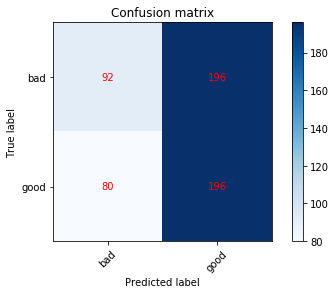

In [194]:
classifier = LogisticRegression(solver='sag')

scoe = cross_val_score(classifier,x_train, y_train , cv=5);
print('accuracy:',scoe.mean())


classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

acc = accuracy_score(y_test,y_pred)
print('accuracy:',acc)

cm = confusion_matrix(y_test,y_pred , labels=[0,1])
plot_confusion_matrix(cm, names=['bad','good'])

In [195]:
title = 'LogisticRegression'
result_maker(title,scoe,acc)

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> ExtraTreesClassifier <h1>
</div>

In [196]:
from sklearn.ensemble import ExtraTreesClassifier

accuracy: 0.5186420300566642
accuracy: 0.48226950354609927


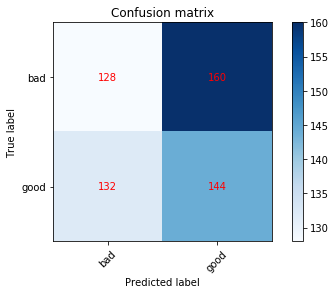

In [197]:
ETC = ExtraTreesClassifier(n_estimators=200)

scoe = cross_val_score(ETC,x_train, y_train , cv=5);
print('accuracy:',scoe.mean())


ETC.fit(x_train, y_train)
y_pred = ETC.predict(x_test)

acc = accuracy_score(y_test,y_pred)
print('accuracy:',acc)

cm = confusion_matrix(y_test,y_pred , labels=[0,1])
plot_confusion_matrix(cm, names=['bad','good'])

In [198]:
title = 'ExtraTreesClassifier'
result_maker(title,scoe,acc)

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> XGBRegressor <h1>
</div>

In [199]:
from sklearn.model_selection import train_test_split, cross_val_score

accuracy: -0.02536328941103716
accuracy: 0.4875886524822695


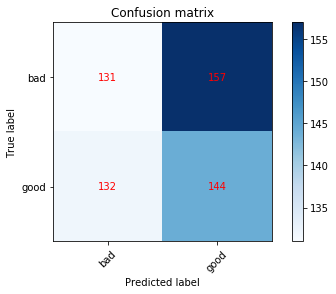

In [200]:
from xgboost import XGBRegressor

model_xgb_Regressor = XGBRegressor(n_estimators=60,early_stopping_rounds='auto',verbose=True,random_state=10)

scoe = cross_val_score(model_xgb_Regressor,x_train, y_train , cv=5);
print('accuracy:',scoe.mean())

model_xgb_Regressor.fit(x_train, y_train)
y_pred = model_xgb_Regressor.predict(x_test)
for num in range(len(y_pred)):
    if y_pred[num]>0.50:
        y_pred[num]=1
    else:
         y_pred[num]=0
            

acc = accuracy_score(y_test,y_pred)
print('accuracy:',acc)

cm = confusion_matrix(y_test,y_pred , labels=[0,1])
plot_confusion_matrix(cm, names=['bad','good'])

In [201]:
title = 'XGBRegressor'
result_maker(title,scoe,acc)

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> KNeighborsClassifier <h1>
</div>

accuracy: 0.5226459719142647
accuracy: 0.4875886524822695


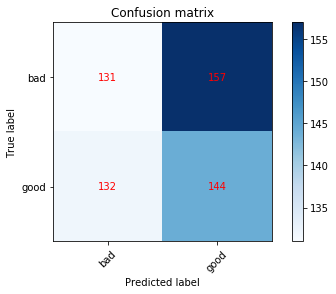

In [202]:
from sklearn.neighbors import KNeighborsClassifier
kmean = KNeighborsClassifier()
scoe = cross_val_score(kmean, x_train, y_train , cv=5);
print('accuracy:',scoe.mean())

kmean.fit(x_train, y_train)
y_pred = model_xgb_Regressor.predict(x_test)
for num in range(len(y_pred)):
    if y_pred[num]>0.50:
        y_pred[num]=1
    else:
         y_pred[num]=0
            
acc = accuracy_score(y_test,y_pred)
print('accuracy:',acc)

cm = confusion_matrix(y_test,y_pred , labels=[0,1])
plot_confusion_matrix(cm, names=['bad','good'])

In [203]:
title = 'KNeighborsClassifier'
result_maker(title,scoe,acc)

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> GaussianNB <h1>
</div>

accuracy: 0.5013215077605322
accuracy: 0.5070921985815603


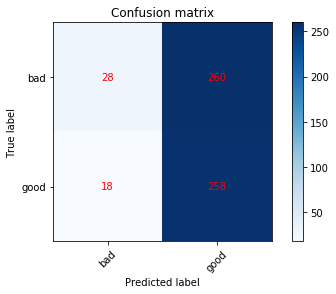

In [204]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train, y_train)
scoe = cross_val_score(GNB, x_train, y_train , cv=5);
print('accuracy:',scoe.mean())

GNB.fit(x_train, y_train)
y_pred = GNB.predict(x_test)
for num in range(len(y_pred)):
    if y_pred[num]>0.50:
        y_pred[num]=1
    else:
         y_pred[num]=0
            
acc = accuracy_score(y_test,y_pred)
print('accuracy:',acc)

cm = confusion_matrix(y_test,y_pred , labels=[0,1])
plot_confusion_matrix(cm, names=['bad','good'])

In [205]:
title = ' GaussianNB'
result_maker(title,scoe,acc)

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> DecisionTreeClassifier <h1>
</div>

accuracy: 0.5044365607292437
accuracy: 0.5212765957446809


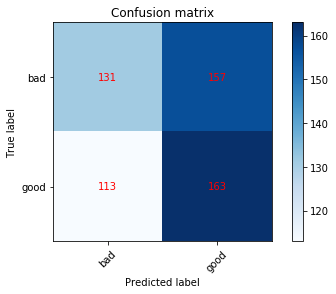

In [206]:
from sklearn.tree import DecisionTreeClassifier
model_DecisionTree = DecisionTreeClassifier(max_leaf_nodes=300)
scoe = cross_val_score(model_DecisionTree, x_train, y_train , cv=5);
print('accuracy:',scoe.mean())

model_DecisionTree.fit(x_train, y_train)
y_pred = model_DecisionTree.predict(x_test)
for num in range(len(y_pred)):
    if y_pred[num]>0.50:
        y_pred[num]=1
    else:
         y_pred[num]=0
            
acc = accuracy_score(y_test,y_pred)
print('accuracy:',acc)

cm = confusion_matrix(y_test,y_pred , labels=[0,1])
plot_confusion_matrix(cm, names=['bad','good'])

In [207]:
title = 'DecisionTreeClassifier'
result_maker(title,scoe,acc)

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> LinearSVC <h1>
</div>

accuracy: 0.5106331608770633
accuracy: 0.5106382978723404


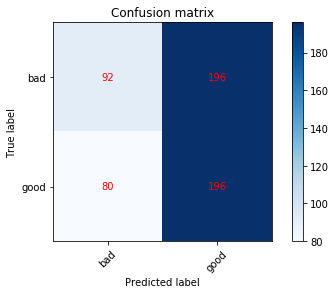

In [208]:
from sklearn.svm import LinearSVC
LSVC = LinearSVC()

scoe = cross_val_score(LSVC, x_train, y_train , cv=5);
print('accuracy:',scoe.mean())

LSVC.fit(x_train, y_train)
y_pred = LSVC.predict(x_test)
for num in range(len(y_pred)):
    if y_pred[num]>0.50:
        y_pred[num]=1
    else:
         y_pred[num]=0
            
acc = accuracy_score(y_test,y_pred)
print('accuracy:',acc)

cm = confusion_matrix(y_test,y_pred , labels=[0,1])
plot_confusion_matrix(cm, names=['bad','good'])

In [209]:
title = ' LinearSVC'
result_maker(title,scoe,acc)